In [22]:
# !pip install pandas
# !pip install os
# !pip install matplotlib
# !pip install seaborn 
# !pip install tensorflow
# !pip install keras
# !pip install opencv-python
# !pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 165.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 294.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.5 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.2/38.5 MB 2.4 MB/s eta 0:00:17
   ---------------------------------------- 0.3/38.5 MB 2.5 MB/s eta 0:00:16
   ---------------------------------------- 0.4/38.5 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.4/38.5 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.6/38.5 MB 2.4 MB/s eta 0:00:17
    -------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [10]:
train_dir = "C:/Users/cryin/Work/vc-emotion-detection-master/dataset/test" #passing the path with training images
test_dir = "C:/Users/cryin/Work/vc-emotion-detection-master/dataset/train"   #passing the path with testing images

In [11]:
img_size = 48 #original size of the image

In [12]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [13]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [15]:
"""
Modeling


model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))

"""

"\nModeling\n\n\nmodel = Sequential()\nmodel.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Flatten())\nmodel.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(units = 64,activation = 'relu'

In [17]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [43]:
# model.summary()

In [44]:
epochs = 100
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 612ms/step - accuracy: 0.8622 - loss: 1.1644 - val_accuracy: 0.5901 - val_loss: 2.5132
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 578ms/step - accuracy: 0.8601 - loss: 1.1744 - val_accuracy: 0.5959 - val_loss: 2.3620
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 584ms/step - accuracy: 0.8679 - loss: 1.1510 - val_accuracy: 0.5905 - val_loss: 2.4143
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 584ms/step - accuracy: 0.8599 - loss: 1.1712 - val_accuracy: 0.5955 - val_loss: 2.3966
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 585ms/step - accuracy: 0.8556 - loss: 1.1704 - val_accuracy: 0.5881 - val_loss: 2.3687
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 576ms/step - accuracy: 0.8672 - loss: 1.1517 - val_accuracy: 0.6048 - val_loss: 2.3104
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 578ms/step - accuracy: 0.8719 - loss: 1.1523 - val_accuracy: 0.6009 - val_loss: 2.3210
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 578ms/step - accuracy: 0.8623 - loss: 1.1586 - 

359/359 [==============================] - 29s 82ms/step - loss: 1.3231 - accuracy: 0.6664 - val_loss: 1.3850 - val_accuracy: 0.6571
Epoch 58/60
359/359 [==============================] - 30s 82ms/step - loss: 1.3126 - accuracy: 0.6677 - val_loss: 1.4074 - val_accuracy: 0.6446
Epoch 59/60
359/359 [==============================] - 29s 82ms/step - loss: 1.3206 - accuracy: 0.6664 - val_loss: 1.3899 - val_accuracy: 0.6578
Epoch 60/60
359/359 [==============================] - 30s 82ms/step - loss: 1.3137 - accuracy: 0.6702 - val_loss: 1.4016 - val_accuracy: 0.6522


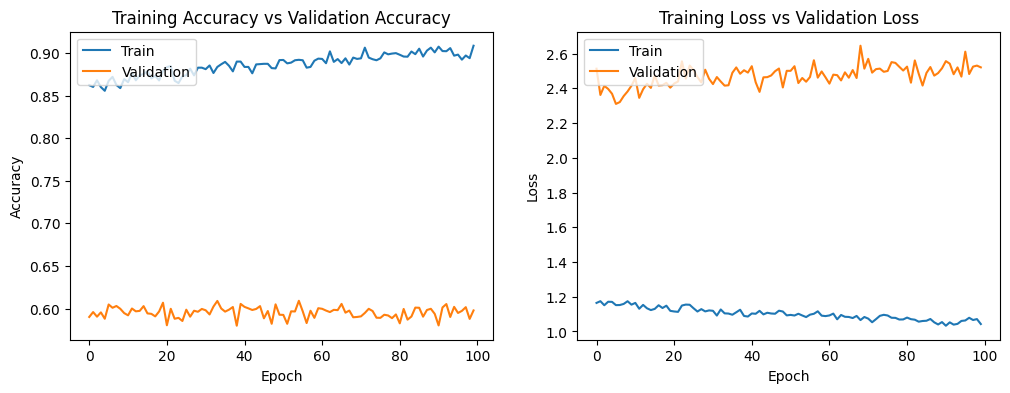

In [45]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [46]:
model.save('model_optimal.h5')

(48, 48)


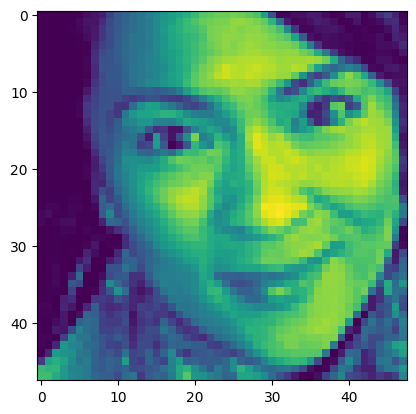

In [49]:
img = image.load_img("C:/Users/cryin/Work/vc-emotion-detection-master/dataset/train/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [50]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [51]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0)]


In [52]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [53]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9807 - loss: 0.8472
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.5978 - loss: 2.5209
final train accuracy = 98.07 , validation accuracy = 59.78


In [47]:
model.save_weights('model_weights.weights.h5')